# IBM HR Analytics Employee Attrition & Performance
Predict attrition of your valuable employees


https://www.kaggle.com/pavansubhasht/ibm-hr-analytics-attrition-dataset

In [157]:
import os
import copy
import time
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from collections import Counter

import pickle
import sklearn
from sklearn.impute import SimpleImputer
from sklearn.metrics import classification_report
from sklearn.ensemble import (RandomTreesEmbedding, RandomForestClassifier,
                              GradientBoostingClassifier)


from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

from sklearn.svm import SVC
from sklearn import svm
from sklearn.model_selection import StratifiedKFold,KFold
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.linear_model import LogisticRegressionCV,LogisticRegression,SGDClassifier,PassiveAggressiveClassifier,Perceptron
from sklearn.naive_bayes import MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,ExtraTreesClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis


from sklearn.metrics import f1_score,accuracy_score
from sklearn.model_selection import RandomizedSearchCV
import xgboost
import catboost as cb
from catboost import CatBoostClassifier, Pool
from sklearn.tree import DecisionTreeClassifier


import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms


import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
plt.ion()   # interactive mode
%matplotlib inline
from IPython.display import Image

import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU, PReLU, ELU
from keras.layers import Dropout
from matplotlib import pyplot
from sklearn.metrics import mean_squared_error
from keras.layers import LSTM, GRU
from keras.callbacks import EarlyStopping
from keras.layers import Activation

# device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
# data.head(2)

import sklearn
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
import pandas as pd
import seaborn as sns; sns.set_theme()
import matplotlib.pyplot as plt


In [158]:
Train=pd.read_csv(".\\employee_attrition.csv",na_values=[])
Train=Train.drop("Over18",axis=1)

# EDA (Exploratory Data Analysis)

In [159]:
import sweetviz as sv

#EDA using Autoviz
sweet_report = sv.analyze(pd.read_csv("./employee_attrition.csv"))

#Saving results to HTML file
sweet_report.show_html('sweetviz_report.html')


                                             |                                             | [  0%]   00:00 ->…

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [160]:
from pandas_profiling import ProfileReport

profile = ProfileReport(Train, title='IBM_HR_Employee_Attrition_Report',minimal=True, explorative = True)
profile.to_file('IBM_HR_Employee_Attrition_Profil.html')


Summarize dataset:   0%|          | 0/42 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [161]:
Train

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [162]:
Train=Train.drop(["EmployeeNumber"],axis=1)

# Pre-Processing (Encoding & Normalization)

In [163]:
def label(df):
    df1 = df.select_dtypes(include=['object'])
    for i in df.columns:
        if df[i].dtypes == 'object':         
            labelencoder = LabelEncoder()
            df[i] = labelencoder.fit_transform(df[i])
    return df 

Train=label(Train)
Train.head(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,2,1102,2,1,2,1,1,2,...,1,80,0,8,0,1,6,4,0,5
1,49,0,1,279,1,8,1,1,1,3,...,4,80,1,10,3,3,10,7,1,7
2,37,1,2,1373,1,2,2,4,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,0,1,1392,1,3,4,1,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,0,2,591,1,2,1,3,1,1,...,4,80,1,6,3,3,2,2,2,2


In [164]:
def means(df):
    df1=df.columns
    my_imputer = SimpleImputer()
    imputed_X= pd.DataFrame(my_imputer.fit_transform(df))
    df= pd.DataFrame(my_imputer.transform(df))
    df=MinMaxScaler().fit_transform(df)
    df=pd.DataFrame(df)
    df.columns=df1
    return df 
        
# Train=means(Train)  
# Train.head(5)

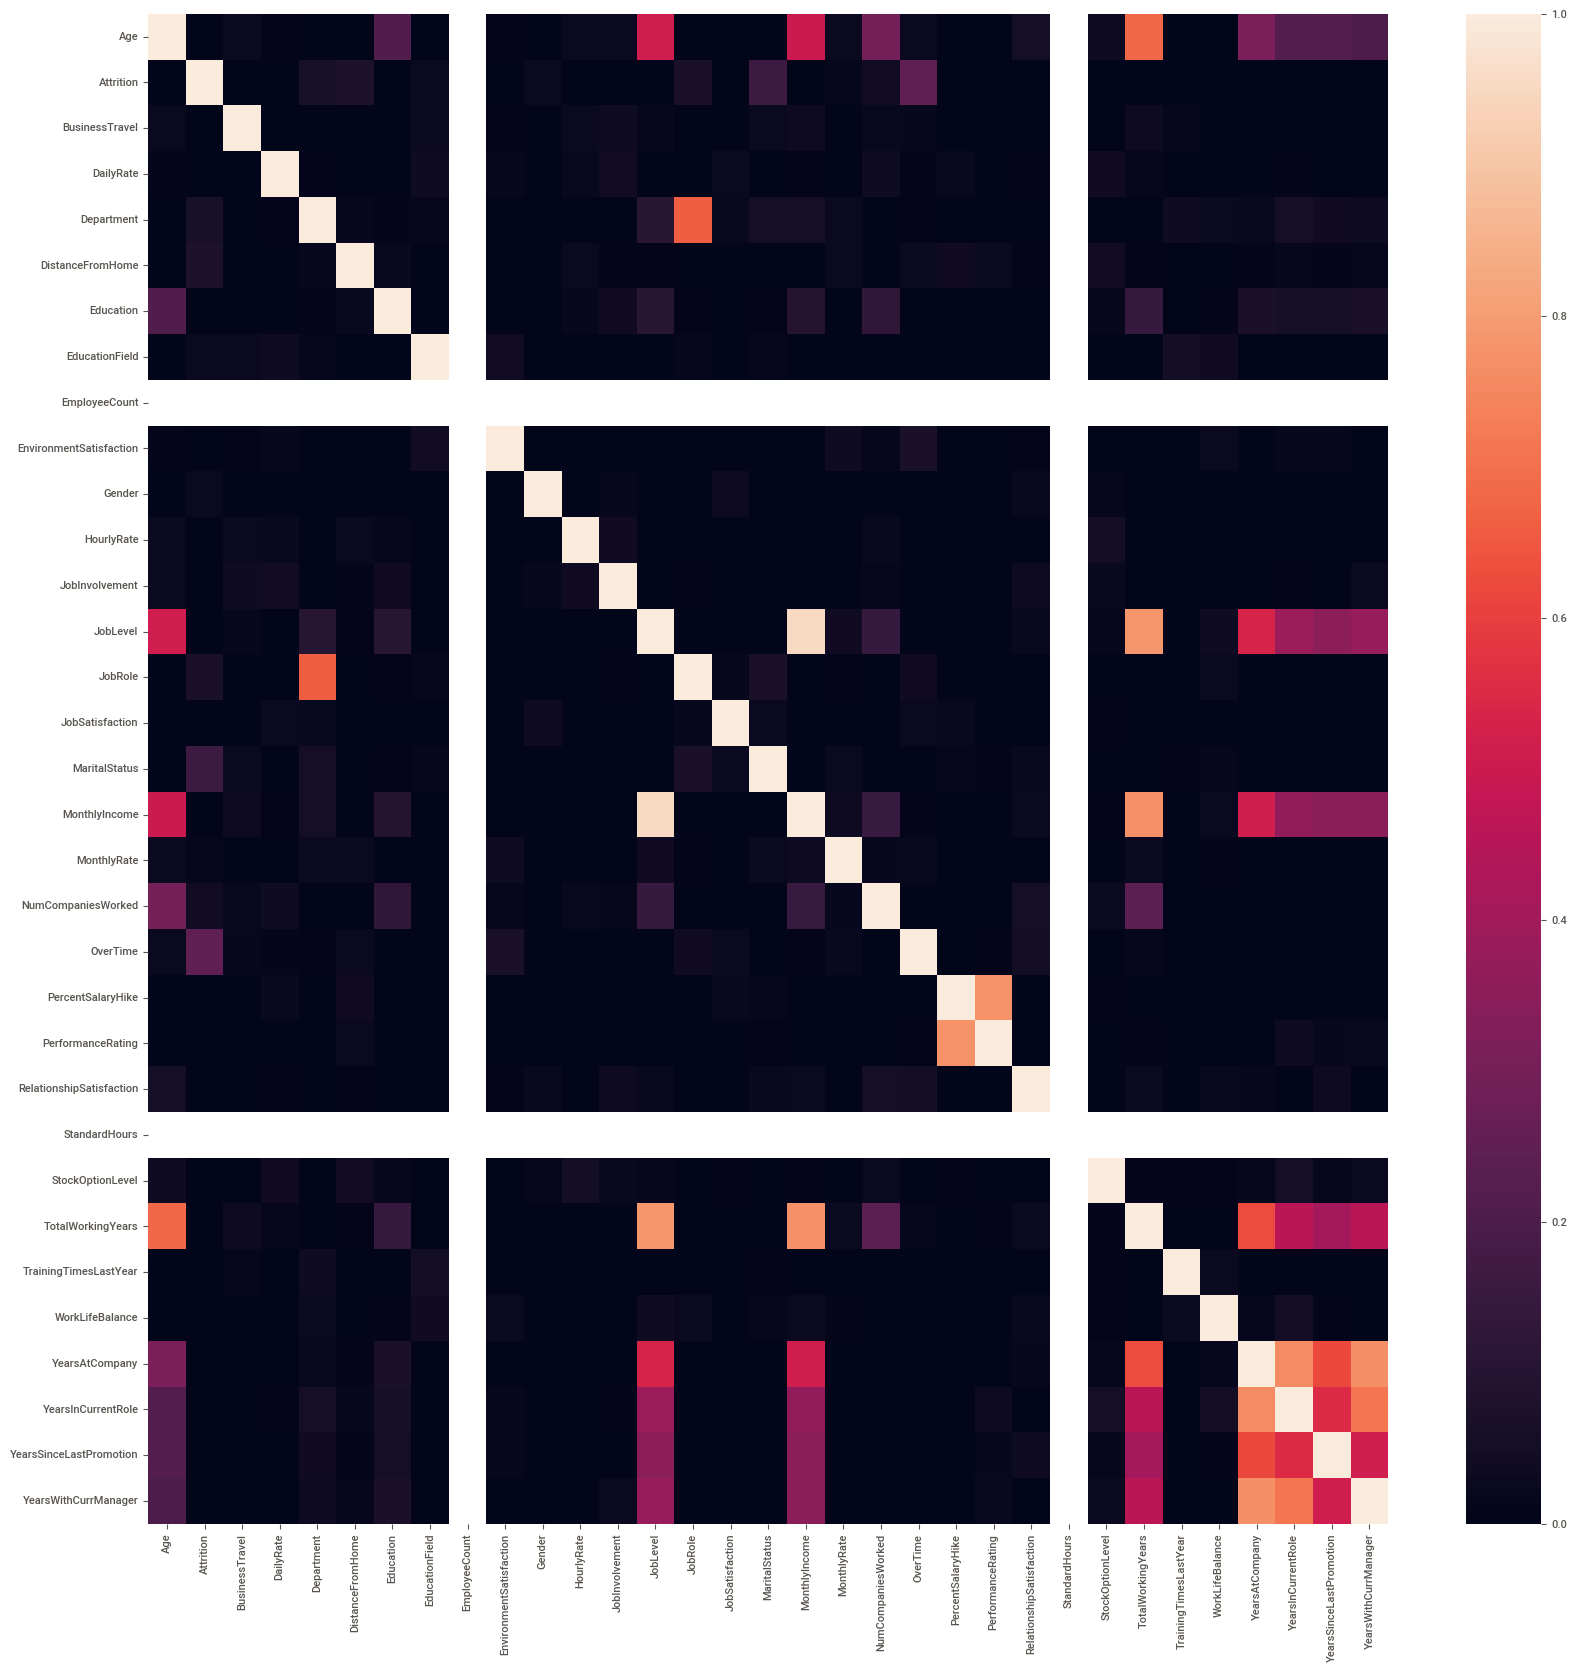

In [165]:

uniform_data = Train.corr()
ax = plt.subplots(figsize=(20,20))
annot_kws={'fontsize':10, 
           'fontstyle':'italic',  
           'color':"k",
           'alpha':0.5, 
           'rotation':"vertical",
           'verticalalignment':'center',
           'backgroundcolor':'w'}
ax=sns.heatmap(uniform_data,annot=False, annot_kws= annot_kws,fmt="f",vmin=0, vmax=1)


In [166]:
Y=Train["Attrition"]
Train=Train.drop("Attrition",axis=1)

# Feature Enginnering

In [167]:
selector=xgboost.XGBClassifier(n_estimators= 100,verbosity=0, max_depth= 40, learning_rate= 0.01, gamma= 0.07, colsample_bytree= 0.6)
selector.fit(Train, Y)
feature_imp = selector.feature_importances_


from collections import Counter,defaultdict
a=[]
b=[]
for index, val in enumerate(feature_imp):
    temp=round((val * 1000), 2)
    a.append(Train.columns[index])
    b.append(temp)
t=pd.DataFrame()
t["Features"]=a
t["avg"]=b
t=t.sort_values(by = 'avg',ascending=False)
print("\n",list(t.Features))
t.reset_index(drop=True)


 ['OverTime', 'JobLevel', 'StockOptionLevel', 'TotalWorkingYears', 'MonthlyIncome', 'MaritalStatus', 'YearsWithCurrManager', 'Department', 'JobRole', 'EnvironmentSatisfaction', 'YearsAtCompany', 'JobInvolvement', 'Age', 'JobSatisfaction', 'WorkLifeBalance', 'NumCompaniesWorked', 'YearsInCurrentRole', 'DistanceFromHome', 'BusinessTravel', 'YearsSinceLastPromotion', 'HourlyRate', 'RelationshipSatisfaction', 'DailyRate', 'EducationField', 'PercentSalaryHike', 'MonthlyRate', 'TrainingTimesLastYear', 'Education', 'Gender', 'PerformanceRating', 'StandardHours', 'EmployeeCount']


,Features,avg
0,OverTime,273.20
1,JobLevel,81.99
2,StockOptionLevel,41.80
3,TotalWorkingYears,40.53
4,MonthlyIncome,37.43
5,MaritalStatus,31.21
6,YearsWithCurrManager,29.10
7,Department,29.03
8,JobRole,26.58
9,EnvironmentSatisfaction,26.23


In [168]:
Train=pd.DataFrame(Train,columns=[i for i in t.Features])
Train

,OverTime,JobLevel,StockOptionLevel,TotalWorkingYears,MonthlyIncome,MaritalStatus,YearsWithCurrManager,Department,JobRole,EnvironmentSatisfaction,...,DailyRate,EducationField,PercentSalaryHike,MonthlyRate,TrainingTimesLastYear,Education,Gender,PerformanceRating,StandardHours,EmployeeCount
0,1,2,0,8,5993,2,5,2,7,2,...,1102,1,11,19479,0,2,0,3,80,1
1,0,2,1,10,5130,1,7,1,6,3,...,279,1,23,24907,3,1,1,4,80,1
2,1,1,0,7,2090,2,0,1,2,4,...,1373,4,15,2396,3,2,1,3,80,1
3,1,1,0,8,2909,1,0,1,6,4,...,1392,1,11,23159,3,4,0,3,80,1
4,0,1,1,6,3468,1,2,1,2,1,...,591,3,12,16632,3,1,1,3,80,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,2,1,17,2571,1,3,1,2,3,...,884,3,17,12290,3,2,1,3,80,1
1466,0,3,1,9,9991,1,7,1,0,4,...,613,3,15,21457,5,1,1,3,80,1
1467,1,2,1,6,6142,1,3,1,4,2,...,155,1,20,5174,0,3,1,4,80,1
1468,0,2,0,17,5390,1,8,2,7,4,...,1023,3,14,13243,3,3,1,3,80,1


## Classification into Groups

In [169]:
for i in Train.columns:
    print(i,len(Train[i].unique()),"  " ,min(Train[i]),max(Train[i]) ,"")
    

OverTime 2    0 1 
JobLevel 5    1 5 
StockOptionLevel 4    0 3 
TotalWorkingYears 40    0 40 
MonthlyIncome 1349    1009 19999 
MaritalStatus 3    0 2 
YearsWithCurrManager 18    0 17 
Department 3    0 2 
JobRole 9    0 8 
EnvironmentSatisfaction 4    1 4 
YearsAtCompany 37    0 40 
JobInvolvement 4    1 4 
Age 43    18 60 
JobSatisfaction 4    1 4 
WorkLifeBalance 4    1 4 
NumCompaniesWorked 10    0 9 
YearsInCurrentRole 19    0 18 
DistanceFromHome 29    1 29 
BusinessTravel 3    0 2 
YearsSinceLastPromotion 16    0 15 
HourlyRate 71    30 100 
RelationshipSatisfaction 4    1 4 
DailyRate 886    102 1499 
EducationField 6    0 5 
PercentSalaryHike 15    11 25 
MonthlyRate 1427    2094 26999 
TrainingTimesLastYear 7    0 6 
Education 5    1 5 
Gender 2    0 1 
PerformanceRating 2    3 4 
StandardHours 1    80 80 
EmployeeCount 1    1 1 


In [170]:
df=pd.cut(Train['MonthlyIncome'], 5)
sorted(df.unique())
Train.loc[(Train['MonthlyIncome'] > 990) & (Train['MonthlyIncome'] <= 4807), 'MonthlyIncome'] = 0
Train.loc[(Train['MonthlyIncome'] > 4807) & (Train['MonthlyIncome'] <= 8605), 'MonthlyIncome'] = 1
Train.loc[(Train['MonthlyIncome'] > 8605) & (Train['MonthlyIncome'] <= 12403), 'MonthlyIncome'] =2
Train.loc[(Train['MonthlyIncome'] > 12403) & (Train['MonthlyIncome'] <= 16201), 'MonthlyIncome'] =3
Train.loc[(Train['MonthlyIncome'] > 16201) & (Train['MonthlyIncome'] <= 19999.0), 'MonthlyIncome'] =4

In [171]:
df=pd.cut(Train['TotalWorkingYears'], 5)
sorted(df.unique())

Train.loc[ (Train['TotalWorkingYears'] <= 8), 'TotalWorkingYears'] = 0
Train.loc[(Train['TotalWorkingYears'] >8) & (Train['TotalWorkingYears'] <= 16), 'TotalWorkingYears'] = 1
Train.loc[(Train['TotalWorkingYears'] >16) & (Train['TotalWorkingYears'] <= 24), 'TotalWorkingYears'] = 2
Train.loc[(Train['TotalWorkingYears'] >24) & (Train['TotalWorkingYears'] <= 32), 'TotalWorkingYears'] = 3
Train.loc[ Train['TotalWorkingYears'] > 32, 'TotalWorkingYears']=4


In [172]:
df=pd.cut(Train['YearsWithCurrManager'], 5)
sorted(df.unique())

Train.loc[ Train['YearsWithCurrManager'] <= 1.7, 'YearsWithCurrManager'] = 0
Train.loc[(Train['YearsWithCurrManager'] > 3.4) & (Train['YearsWithCurrManager'] <= 6.8), 'MonthlyIncome'] = 1
Train.loc[(Train['YearsWithCurrManager'] >6.8) & (Train['YearsWithCurrManager'] <= 10.2), 'MonthlyIncome'] = 2
Train.loc[(Train['YearsWithCurrManager'] >10.2) & (Train['YearsWithCurrManager'] <= 13.6), 'MonthlyIncome'] = 3
Train.loc[(Train['YearsWithCurrManager'] >13.6) & (Train['YearsWithCurrManager'] <= 17.0), 'MonthlyIncome'] = 4


In [173]:

df=pd.cut(Train['YearsAtCompany'], 5)
sorted(df.unique())

Train.loc[ Train['YearsAtCompany'] <= 8, 'YearsAtCompany'] = 0
Train.loc[(Train['YearsAtCompany'] > 8) & (Train['YearsAtCompany'] <= 16), 'YearsAtCompany'] = 1
Train.loc[(Train['YearsAtCompany'] >16) & (Train['YearsAtCompany'] <= 24), 'YearsAtCompany'] = 2
Train.loc[(Train['YearsAtCompany'] >24) & (Train['YearsAtCompany'] <= 32), 'YearsAtCompany'] = 3
Train.loc[(Train['YearsAtCompany'] >32) & (Train['YearsAtCompany'] <= 40), 'YearsAtCompany'] = 4


In [174]:
# DistanceFromHome 5
df=pd.cut(Train['YearsInCurrentRole'], 5)
sorted(df.unique())

Train.loc[ Train['YearsInCurrentRole'] <=4 , 'YearsInCurrentRole'] = 0
Train.loc[(Train['YearsInCurrentRole'] > 4) & (Train['YearsInCurrentRole'] <= 8), 'YearsInCurrentRole'] = 1
Train.loc[(Train['YearsInCurrentRole'] > 8) & (Train['YearsInCurrentRole'] <= 12), 'YearsInCurrentRole'] = 2
Train.loc[(Train['YearsInCurrentRole'] >12) & (Train['YearsInCurrentRole'] <= 16), 'YearsInCurrentRole'] = 3
Train.loc[ Train['YearsInCurrentRole'] > 16, 'YearsInCurrentRole']=4

In [175]:
# Age 10
df=pd.cut(Train['Age'], 5)
sorted(df.unique())

Train.loc[ Train['Age'] <=27 , 'Age'] = 0
Train.loc[(Train['Age'] > 27) & (Train['Age'] <= 35), 'Age'] = 1
Train.loc[(Train['Age'] > 35) & (Train['Age'] <= 44), 'Age'] = 2
Train.loc[(Train['Age'] >44) & (Train['Age'] <= 52), 'Age'] = 3
Train.loc[ Train['Age'] > 52, 'Age']=4

In [176]:
# Age 10
df=pd.cut(Train['DistanceFromHome'], 5)
sorted(df.unique())

Train.loc[ Train['DistanceFromHome'] <=7 , 'DistanceFromHome'] = 0
Train.loc[(Train['DistanceFromHome'] > 7) & (Train['DistanceFromHome'] <= 13), 'DistanceFromHome'] = 1
Train.loc[(Train['DistanceFromHome'] > 13) & (Train['DistanceFromHome'] <= 18), 'DistanceFromHome'] = 2
Train.loc[(Train['DistanceFromHome'] >18) & (Train['DistanceFromHome'] <= 24), 'DistanceFromHome'] = 3
Train.loc[ Train['DistanceFromHome'] > 24, 'DistanceFromHome']=4


In [177]:

df=pd.cut(Train['HourlyRate'], 5)
sorted(df.unique())

Train.loc[ Train['HourlyRate'] <=44 , 'HourlyRate'] = 0
Train.loc[(Train['HourlyRate'] > 44) & (Train['HourlyRate'] <= 58), 'HourlyRate'] = 1
Train.loc[(Train['HourlyRate'] > 58) & (Train['HourlyRate'] <= 72), 'HourlyRate'] = 2
Train.loc[(Train['HourlyRate'] >72) & (Train['HourlyRate'] <= 86), 'HourlyRate'] = 3
Train.loc[ Train['HourlyRate'] > 86, 'HourlyRate']=4


In [178]:
# DailyRate
df=pd.cut(Train['DailyRate'], 5)
sorted(df.unique())

Train.loc[ Train['DailyRate'] <=380 , 'DailyRate'] = 0
Train.loc[(Train['DailyRate'] > 380) & (Train['DailyRate'] <= 660), 'DailyRate'] = 1
Train.loc[(Train['DailyRate'] > 660) & (Train['DailyRate'] <= 940), 'DailyRate'] = 2
Train.loc[(Train['DailyRate'] >940) & (Train['DailyRate'] <= 1220), 'DailyRate'] = 3
Train.loc[ Train['DailyRate'] > 1220, 'DailyRate']=4


In [179]:
# MonthlyRate
df=pd.cut(Train['MonthlyRate'], 5)
sorted(df.unique())

Train.loc[ Train['MonthlyRate'] <=7075 , 'MonthlyRate'] = 0
Train.loc[(Train['MonthlyRate'] > 7075) & (Train['MonthlyRate'] <= 12056), 'MonthlyRate'] = 1
Train.loc[(Train['MonthlyRate'] > 12056) & (Train['MonthlyRate'] <= 17037), 'MonthlyRate'] = 2
Train.loc[(Train['MonthlyRate'] > 17037) & (Train['MonthlyRate'] <= 22018), 'MonthlyRate'] = 3
Train.loc[ Train['MonthlyRate'] > 22018, 'MonthlyRate']=4


In [180]:
for i in Train.columns:
    print(i,len(Train[i].unique()),"  " ,min(Train[i]),max(Train[i]) ,"")
    

OverTime 2    0 1 
JobLevel 5    1 5 
StockOptionLevel 4    0 3 
TotalWorkingYears 5    0 4 
MonthlyIncome 5    0 4 
MaritalStatus 3    0 2 
YearsWithCurrManager 17    0 17 
Department 3    0 2 
JobRole 9    0 8 
EnvironmentSatisfaction 4    1 4 
YearsAtCompany 5    0 4 
JobInvolvement 4    1 4 
Age 5    0 4 
JobSatisfaction 4    1 4 
WorkLifeBalance 4    1 4 
NumCompaniesWorked 10    0 9 
YearsInCurrentRole 5    0 4 
DistanceFromHome 5    0 4 
BusinessTravel 3    0 2 
YearsSinceLastPromotion 16    0 15 
HourlyRate 5    0 4 
RelationshipSatisfaction 4    1 4 
DailyRate 5    0 4 
EducationField 6    0 5 
PercentSalaryHike 15    11 25 
MonthlyRate 5    0 4 
TrainingTimesLastYear 7    0 6 
Education 5    1 5 
Gender 2    0 1 
PerformanceRating 2    3 4 
StandardHours 1    80 80 
EmployeeCount 1    1 1 


In [181]:
Train1=Train
Train1["Output"]=Y

# EDA with Features

<AxesSubplot:xlabel='OverTime', ylabel='count'>

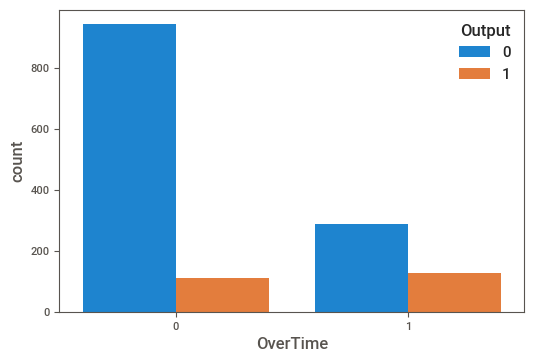

In [182]:
sns.countplot(x="OverTime",hue='Output', data=Train1)

# OverTime
# 1 NO
# 2 Yes


<AxesSubplot:xlabel='JobLevel', ylabel='count'>

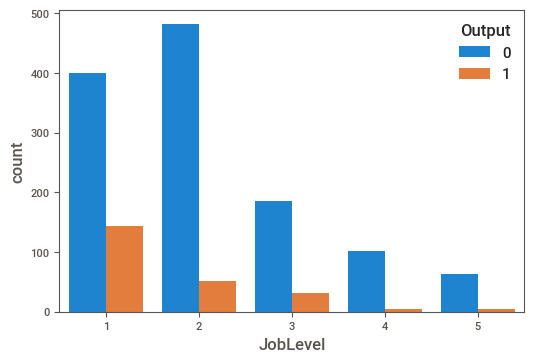

In [183]:
sns.countplot(x="JobLevel",hue='Output', data=Train1)

# JobInvolvement
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'

<AxesSubplot:xlabel='StockOptionLevel', ylabel='count'>

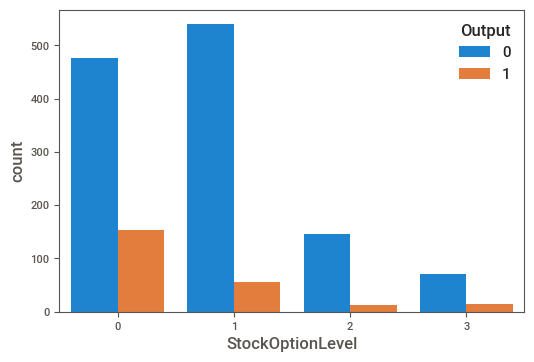

In [184]:
sns.countplot(x="StockOptionLevel",hue='Output', data=Train1)

# StockOptionLevel
# 1 'No'
# 2 'Low'
# 3 'Medium'
# 4 'High'

# Mostly New Freshers (switching jobs)

<AxesSubplot:xlabel='MonthlyIncome', ylabel='count'>

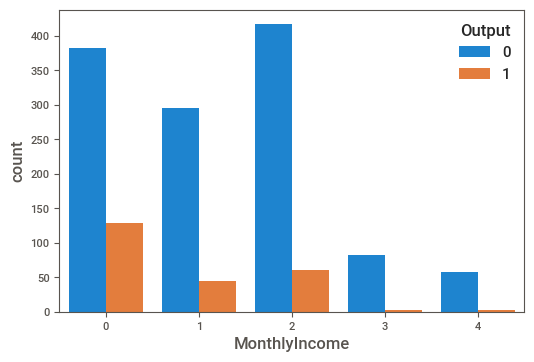

In [185]:
sns.countplot(x="MonthlyIncome",hue='Output', data=Train1)

# df=pd.cut(df['MonthlyIncome'], 5)
# sorted(df.unique())

# MonthlyIncome
# 1  Interval(990.01, 4807.0, closed='right')
# 2  Interval(4807.0, 8605.0, closed='right')
# 3  Interval(8605.0, 12403.0, closed='right')
# 4  Interval(12403.0, 16201.0, closed='right')
# 5  Interval(16201.0, 19999.0, closed='right')

<AxesSubplot:xlabel='TotalWorkingYears', ylabel='count'>

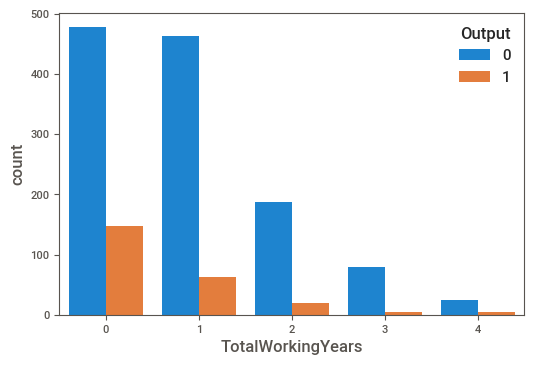

In [186]:
sns.countplot(x="TotalWorkingYears",hue='Output', data=Train1)

#  0 (990.01, 4807.0]
#  1 (4807.0, 8605.0]
#  2 (8605.0, 12403.0]
#  3 (12403.0, 16201.0]
#  4 (16201.0, 19999.0]

<AxesSubplot:xlabel='MaritalStatus', ylabel='count'>

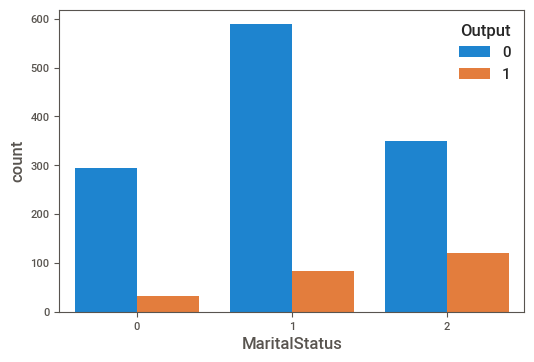

In [187]:
sns.countplot(x="MaritalStatus",hue='Output', data=Train1)
# Mostly Married employees Stays
# 0 Married 
# 1 Single 
# 2 Other 

<AxesSubplot:xlabel='YearsWithCurrManager', ylabel='count'>

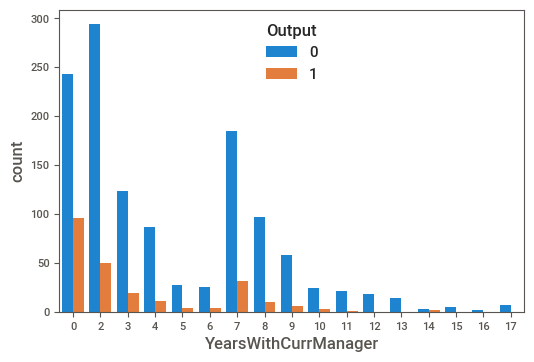

In [188]:
# YearsWithCurrManager
sns.countplot(x="YearsWithCurrManager",hue='Output', data=Train1)


<AxesSubplot:xlabel='JobRole', ylabel='count'>

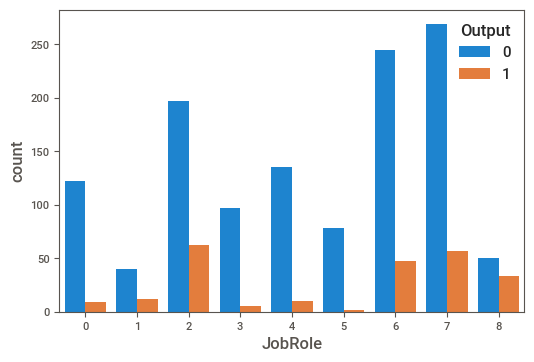

In [189]:
sns.countplot(x="JobRole",hue='Output', data=Train1)

<AxesSubplot:xlabel='JobInvolvement', ylabel='count'>

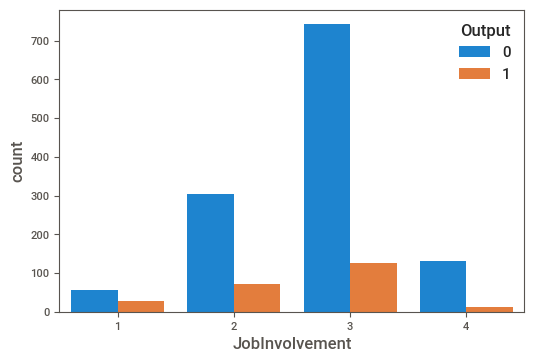

In [190]:
sns.countplot(x="JobInvolvement",hue='Output', data=Train1)

# JobInvolvement
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'


<AxesSubplot:xlabel='JobSatisfaction', ylabel='count'>

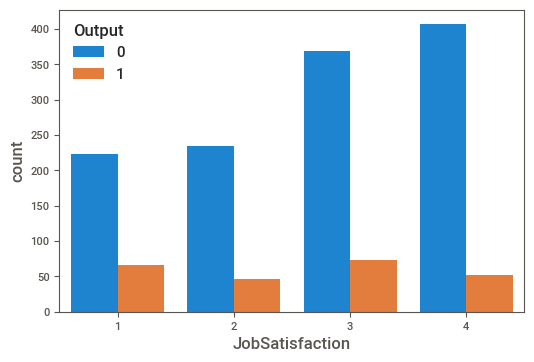

In [191]:
sns.countplot(x="JobSatisfaction",hue='Output', data=Train1)

# JobSatisfaction
# 1 'Low'
# 2 'Medium'
# 3 'High'
# 4 'Very High'


<AxesSubplot:xlabel='Department', ylabel='count'>

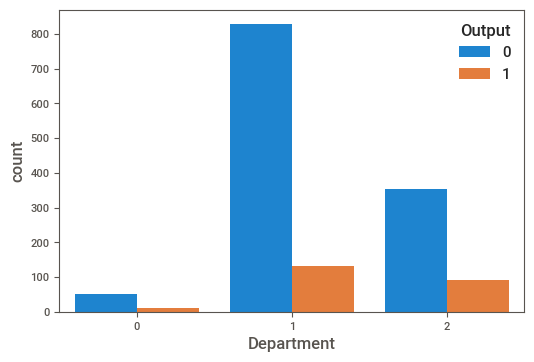

In [192]:
sns.countplot(x="Department",hue='Output', data=Train1)

# 0 Research & Development
# 1 Sales
# 2 Other

<AxesSubplot:xlabel='NumCompaniesWorked', ylabel='count'>

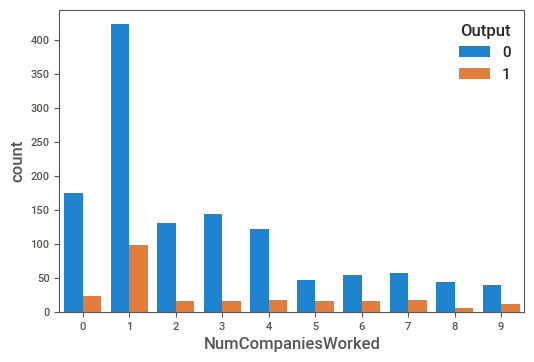

In [193]:
sns.countplot(x="NumCompaniesWorked",hue='Output', data=Train1)

<AxesSubplot:xlabel='YearsInCurrentRole', ylabel='count'>

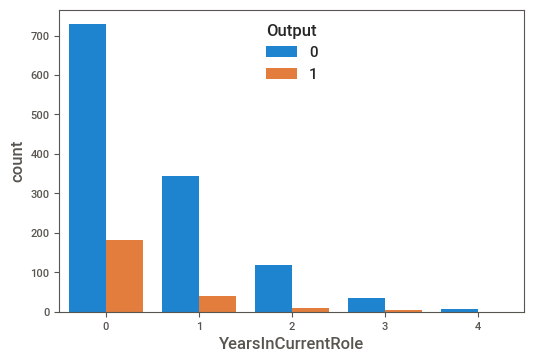

In [194]:
sns.countplot(x="YearsInCurrentRole",hue='Output', data=Train1)

# 0 0-4 yrs
# 1 4-8 yrs
# 2 8-12 yrs
# 3 12-16 yrs
# 4 16-20 yrs

<AxesSubplot:xlabel='Age', ylabel='count'>

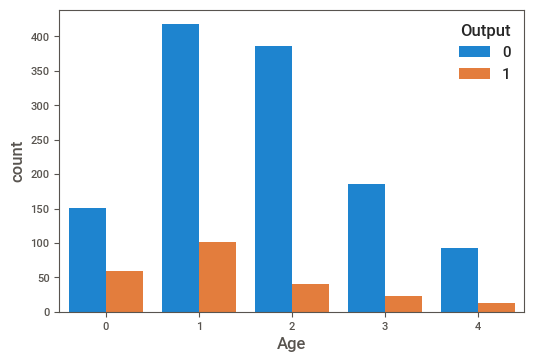

In [195]:
sns.countplot(x="Age",hue='Output', data=Train1)

# 0 18-27
# 1 27-35
# 2 35-44
# 3 44-52
# 4 52-60

In [196]:
Train2=Train1.iloc[:,:6]
Train2["Output"]=Y


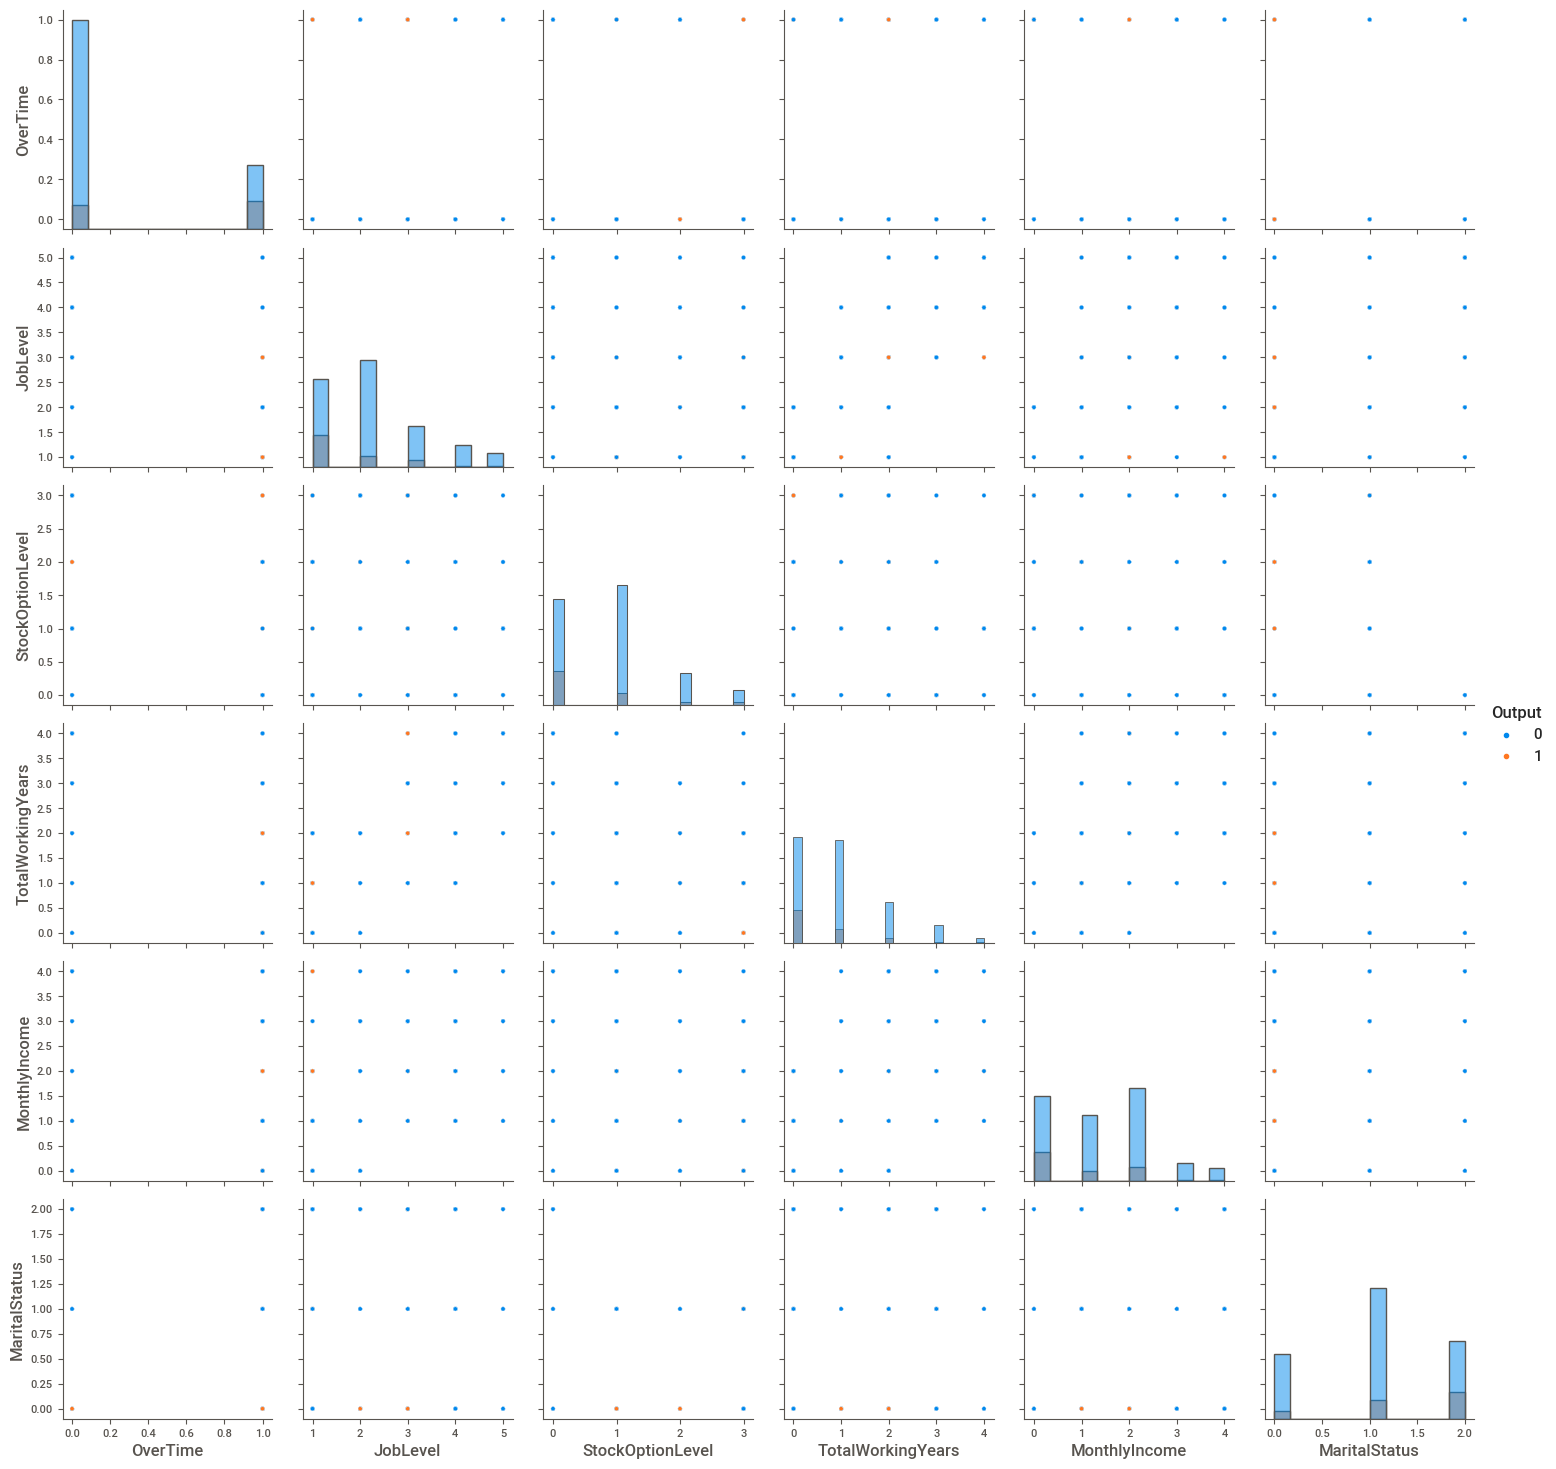

In [197]:
g = sns.PairGrid(Train2, hue="Output")
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

In [198]:
from sklearn.model_selection import KFold,GroupKFold,ShuffleSplit,RepeatedStratifiedKFold,StratifiedKFold,GroupShuffleSplit,StratifiedShuffleSplit,TimeSeriesSplit
from catboost import CatBoostClassifier
from datetime import datetime
n_split=10
acc=[]

X=Train
y=Y
# Xtrain, Xtest=pd.DataFrame(),pd.DataFrame()

import time
# cvs=[ KFold,GroupKFold,ShuffleSplit,RepeatedStratifiedKFold,StratifiedKFold,GroupShuffleSplit,StratifiedShuffleSplit,TimeSeriesSplit]
cvs =[ShuffleSplit] 

def convert_time(sec):
    sec = sec % (24 * 3600)
    hour = sec // 3600
    sec %= 3600
    min = sec // 60
    sec %= 60
    return ("%02d:%02d:%02d" % (hour, min, sec) )

def stratified_cv(X, y, clf_class, shuffle=True,  **kwargs):
    for cv in cvs:
            stratified_k_fold = cv(n_splits=n_split).split(X,y)
            y_pred = y.copy()
            k=0
            last=0
            start=time.time()
            for ii, jj in (stratified_k_fold): 
                curr=time.time()
                k+=1
                Xtrain, Xtest = X.iloc[ii], X.iloc[jj]
                ytrain = y.iloc[ii]
                clf = clf_class(**kwargs)
                clf= clf.fit(Xtrain,ytrain)
#                 clf.grid_search(grid,X=Train,y=Y)
                y_pred.iloc[jj] = clf.predict(Xtest)
                last=time.time()
                p=k*100/n_split
                e=convert_time(last-curr)
                u=convert_time(last-start)
                t=u*n_split
#                 print(p,"% percent completed......",u ," ",datetime.now())

            print(str(clf_class)[16:-2],str(cv)[39:-2])
            print(classification_report(y,y_pred ),"\n")

    #         print(classification_report(y, y_pred))

    return clf


stratified_cv(X, y, svm.SVC)
stratified_cv(X, y, SGDClassifier,max_iter=10)
stratified_cv(X, y, Perceptron)
stratified_cv(X, y, MultinomialNB,alpha=0.01)
stratified_cv(X, y, PassiveAggressiveClassifier)
stratified_cv(X, y,GaussianNB)
stratified_cv(X, y,GaussianProcessClassifier,1.0 * RBF(1.0))
stratified_cv(X, y,KNeighborsClassifier,n_neighbors=5)
stratified_cv(X, y,RandomForestClassifier)
stratified_cv(X, y,AdaBoostClassifier)
stratified_cv(X, y,ExtraTreesClassifier)
stratified_cv(X, y,GradientBoostingClassifier)
stratified_cv(X, y,MLPClassifier,alpha=1, max_iter=1000)
stratified_cv(X, y,QuadraticDiscriminantAnalysis)
stratified_cv(X, y,xgboost.XGBClassifier)
stratified_cv(X, y,cb.CatBoostClassifier,verbose=0,random_seed= 42,
 depth=4, l2_leaf_reg= 4, iterations=800, learning_rate= 0.036)


svm._classes.SVC ShuffleSplit
              precision    recall  f1-score   support

           0       0.89      1.00      0.94      1233
           1       1.00      0.36      0.53       237

    accuracy                           0.90      1470
   macro avg       0.95      0.68      0.74      1470
weighted avg       0.91      0.90      0.88      1470
 

linear_model._stochastic_gradient.SGDClassifier ShuffleSplit
              precision    recall  f1-score   support

           0       0.91      0.95      0.93      1233
           1       0.64      0.49      0.56       237

    accuracy                           0.87      1470
   macro avg       0.77      0.72      0.74      1470
weighted avg       0.86      0.87      0.87      1470
 

linear_model._perceptron.Perceptron ShuffleSplit
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1233
           1       1.00      0.99      0.99       237

    accuracy                          

In [199]:
from sklearn.model_selection import RandomizedSearchCV
import random


# model_selection.GridSearchCV(estimator, …)
# model_selection.HalvingGridSearchCV(…[, …])
# model_selection.ParameterGrid(param_grid)
# model_selection.ParameterSampler(…[, …])
# model_selection.RandomizedSearchCV(…[, …])
# model_selection.HalvingRandomSearchCV(…[, …])

param_dist = {
    'min_child_weight': [0.1, 0.5,1],
    'gamma': [0.5, 1, 1.5, 2, 5],
    'subsample': [1.2, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0],
    'max_depth': [4,5,6],
    'learning_rate': [0.1, 1,1.5,3],
    'n_estimators': [350, 250, 300],
    'reg_alpha': [ 2, 1,3],
    'reg_lambda': [ 2, 1,1.5]
}
clf = xgboost.XGBClassifier()
rsh = RandomizedSearchCV(estimator=clf, param_distributions=param_dist)
rsh.fit(X, y)
rsh.best_params_

{'subsample': 0.8,
 'reg_lambda': 1.5,
 'reg_alpha': 2,
 'n_estimators': 300,
 'min_child_weight': 1,
 'max_depth': 5,
 'learning_rate': 1,
 'gamma': 2,
 'colsample_bytree': 0.6}

In [200]:
# Train /= np.min(Train) # Normalise data to [0, 1] range
# Test /= np.max(Test) 

Train=np.array(Train)
Y=np.array(Y)

Train =  np.reshape(Train,( Train.shape[0],Train.shape[1], 1 ))
print(Train.shape)

# define dataloader parameters
batch_size = 64
num_workers=0
train_tensor = torch.utils.data.TensorDataset(torch.Tensor(Train),torch.Tensor(Y)) 
train_loader = torch.utils.data.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)

train_x, test_x, train_y, test_y = train_test_split(Train, Y,test_size=0.2, random_state=1)


(1470, 33, 1)


In [201]:
from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# clear_session()

model = Sequential()
model.add(Conv1D(64, 2, activation="relu", input_shape=(Train.shape[1], 1)))
# model.add(Flatten())
model.add(Conv1D(32, 2, activation="relu"))
model.add(Conv1D(16, 2, activation="relu"))
model.add(Conv1D(8, 2, activation="relu"))
model.add(Conv1D(4, 2, activation="relu"))
model.add(Flatten())
model.add(Dense(2, activation="softmax"))
model.add(Dense(1))
model.compile(loss="mse", optimizer="adam")
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_20 (Conv1D)           (None, 32, 64)            192       
_________________________________________________________________
conv1d_21 (Conv1D)           (None, 31, 32)            4128      
_________________________________________________________________
conv1d_22 (Conv1D)           (None, 30, 16)            1040      
_________________________________________________________________
conv1d_23 (Conv1D)           (None, 29, 8)             264       
_________________________________________________________________
conv1d_24 (Conv1D)           (None, 28, 4)             68        
_________________________________________________________________
flatten_4 (Flatten)          (None, 112)               0         
_________________________________________________________________
dense_8 (Dense)              (None, 2)                

In [202]:
# from keras.backend import clear_session

pred_y = model.predict(test_x)

print(model.evaluate(test_x,test_y))
 
print("MSE: %.4f" % mean_squared_error(test_y, pred_y))

score = max(0, 100-np.sqrt(mean_squared_error(test_y,pred_y)))
print("SCORE=",score,"%\n")

# clear_session()


10/10 [==============================] - 0s 4ms/step - loss: 0.1900
0.174648752017897
MSE: 0.1746
SCORE= 99.58209001882484 %



# Key Features
    ## TOP 14
    1 'OverTime'
    2 'JobLevel'
    3 'StockOptionLevel'
    4 'MonthlyIncome'
    5 'TotalWorkingYears'
    6 'MaritalStatus'
    7 'YearsWithCurrManager'
    8 'JobRole'
    9 'JobInvolvement'
    10 'EnvironmentSatisfaction'
    11 'Department'
    12 'YearsInCurrentRole'
    13 'NumCompaniesWorked'
    14 'Age'
    
    ## LESS Priority
    15 'BusinessTravel'
    16 'WorkLifeBalance'
    17 'JobSatisfaction'
    18 'DistanceFromHome'
    19 'PerformanceRating'
    20 'YearsSinceLastPromotion'
    21 'HourlyRate'
    22 'DailyRate' 
    23 'RelationshipSatisfaction'
    24 'PercentSalaryHike'
    25 'TrainingTimesLastYear'
    26 'MonthlyRate'
    27 'Education',
    26 'EducationField'
    27 'Gender'
    28 'EmployeeCount'
    29 'StandardHours'
    30 'Over18'